In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KKI COE/dataset/all_dataset_ghg_iot.csv')
data.head(10)

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,2024/03/24-9:45,0.0,0.0,16,"2,73",0,Persiapan Lahan
1,2024/03/24-9:45,0.0,0.0,"16,44","2,95",0,Persiapan Lahan
2,2024/03/24-9:45,0.0,0.0,"16,35","2,93",0,Persiapan Lahan
3,2024/03/24-9:45,0.0,0.0,"16,35","2,94",64,Persiapan Lahan
4,2024/03/24-9:45,0.0,0.0,"15,74","2,92",0,Persiapan Lahan
5,2024/03/24-9:45,0.0,0.0,"16,29","2,9",0,Persiapan Lahan
6,2024/03/24-9:45,0.0,0.0,"16,33","2,85",0,Persiapan Lahan
7,2024/03/24-9:45,0.0,0.0,"16,02","2,85",0,Persiapan Lahan
8,2024/03/24-9:45,0.0,0.0,"16,22","2,76",0,Persiapan Lahan
9,2024/03/24-9:45,0.0,0.0,"15,03","2,74",0,Persiapan Lahan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   7529 non-null   object 
 1   Latitude    7529 non-null   float64
 2   Longtitude  7529 non-null   float64
 3   CH4         7529 non-null   object 
 4   CO2         7529 non-null   object 
 5   NO2         7529 non-null   object 
 6   Status      7529 non-null   object 
dtypes: float64(2), object(5)
memory usage: 411.9+ KB


# Data Construction

In [ ]:
data['CH4'] = data['CH4'].str.replace(',', '.').astype(float)
data['CO2'] = data['CO2'].str.replace(',', '.').astype(float)
data['NO2'] = data['NO2'].str.replace(',', '.').astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   7529 non-null   object 
 1   Latitude    7529 non-null   float64
 2   Longtitude  7529 non-null   float64
 3   CH4         7529 non-null   float64
 4   CO2         7529 non-null   float64
 5   NO2         7529 non-null   float64
 6   Status      7529 non-null   object 
dtypes: float64(5), object(2)
memory usage: 411.9+ KB


In [ ]:
display(data)

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,2024/03/24-9:45,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan
1,2024/03/24-9:45,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan
2,2024/03/24-9:45,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan
3,2024/03/24-9:45,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan
4,2024/03/24-9:45,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan
...,...,...,...,...,...,...,...
7524,2024/03/31 - 13:33,0.0,0.0,32.12,6.00,0.0,Pemupukan
7525,2024/03/31 - 13:33,0.0,0.0,32.12,6.00,0.0,Pemupukan
7526,2024/03/31 - 13:33,0.0,0.0,32.17,7.10,0.0,Pemupukan
7527,2024/03/31 - 13:33,0.0,0.0,31.99,6.00,0.0,Pemupukan


In [ ]:
data['Timestamp'].dtype

dtype('O')

In [ ]:
type(data['Timestamp'].iloc[0])

str

In [ ]:
# Membersihkan data timestamp dengan menghapus spasi yang tidak diperlukan
data['Timestamp'] = data['Timestamp'].str.strip()

# Menghapus spasi di sekitar tanda hubung
data['Timestamp'] = data['Timestamp'].str.replace(' - ', '-')

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [ ]:
data['Timestamp'].dtype

dtype('<M8[ns]')

In [ ]:
display(data)

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,2024-03-24 09:45:00,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan
1,2024-03-24 09:45:00,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan
2,2024-03-24 09:45:00,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan
3,2024-03-24 09:45:00,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan
4,2024-03-24 09:45:00,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan
...,...,...,...,...,...,...,...
7524,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan
7525,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan
7526,2024-03-31 13:33:00,0.0,0.0,32.17,7.10,0.0,Pemupukan
7527,2024-03-31 13:33:00,0.0,0.0,31.99,6.00,0.0,Pemupukan


In [ ]:
data = data.reset_index()

In [ ]:
display(data)

,index,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,0,2024-03-24 09:45:00,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan
1,1,2024-03-24 09:45:00,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan
2,2,2024-03-24 09:45:00,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan
3,3,2024-03-24 09:45:00,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan
4,4,2024-03-24 09:45:00,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan
...,...,...,...,...,...,...,...,...
7524,7524,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan
7525,7525,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan
7526,7526,2024-03-31 13:33:00,0.0,0.0,32.17,7.10,0.0,Pemupukan
7527,7527,2024-03-31 13:33:00,0.0,0.0,31.99,6.00,0.0,Pemupukan


In [ ]:
data = data.drop(columns='index')
display(data)

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,2024-03-24 09:45:00,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan
1,2024-03-24 09:45:00,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan
2,2024-03-24 09:45:00,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan
3,2024-03-24 09:45:00,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan
4,2024-03-24 09:45:00,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan
...,...,...,...,...,...,...,...
7524,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan
7525,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan
7526,2024-03-31 13:33:00,0.0,0.0,32.17,7.10,0.0,Pemupukan
7527,2024-03-31 13:33:00,0.0,0.0,31.99,6.00,0.0,Pemupukan


# Visualization Before Cleaning Data

## Based on gasses

In [ ]:
# Menampilkan sampel data dari kolom Timestamp
print(data['Timestamp'].head())

# Memeriksa tipe data kolom Timestamp
print(data['Timestamp'].dtype)

# Melihat nilai unik atau aneh dalam kolom Timestamp
print(data['Timestamp'].unique())

0   2024-03-24 09:45:00
1   2024-03-24 09:45:00
2   2024-03-24 09:45:00
3   2024-03-24 09:45:00
4   2024-03-24 09:45:00
Name: Timestamp, dtype: datetime64[ns]
datetime64[ns]
<DatetimeArray>
['2024-03-24 09:45:00', '2024-03-24 09:46:00', '2024-03-24 09:47:00',
 '2024-03-24 09:50:00', '2024-03-24 09:51:00', '2024-03-24 09:52:00',
 '2024-03-24 09:53:00', '2024-03-24 09:54:00', '2024-03-24 09:55:00',
 '2024-03-24 09:56:00',
 ...
 '2024-03-31 13:24:00', '2024-03-31 13:25:00', '2024-03-31 13:26:00',
 '2024-03-31 13:27:00', '2024-03-31 13:28:00', '2024-03-31 13:29:00',
 '2024-03-31 13:30:00', '2024-03-31 13:31:00', '2024-03-31 13:32:00',
 '2024-03-31 13:33:00']
Length: 254, dtype: datetime64[ns]


In [ ]:
# visualisasi data co2
fig = px.line(data, x='Timestamp', y='CO2', title='CO2 data for the period 24-25 March')
fig.show()

In [ ]:
# Visualisasi data CO2
fig = px.line(data, x='Timestamp', y='CO2',
              title='CO2 data for the period 24-25 March',
              labels={'Timestamp': 'Timestamp', 'CO2': 'CO2 (ppm)'})

# Menampilkan plot
fig.show()

In [ ]:
# Contoh data (ganti dengan data sebenarnya)
statuses = ['Harvest', 'Land Clearing', 'Fertilisation', 'Land Preparation']
data_vis = {
    'Harvest': (data['Status'] == 'Panen').value_counts()[True],
    'Land Clearing': (data['Status'] == 'Pembukaan Lahan').value_counts()[True],
    'Fertilisation': (data['Status'] == 'Pemupukan').value_counts()[True],
    'Land Preparation': (data['Status'] == 'Persiapan Lahan').value_counts()[True]

}

# Menghitung jumlah data untuk setiap status
counts = [data_vis[status] for status in statuses]

# Membuat DataFrame untuk visualisasi
import pandas as pd
df = pd.DataFrame({
    'Status': statuses,
    'Data Count': counts
})

# Membuat bar chart menggunakan plotly.express
fig = px.bar(df, x='Status', y='Data Count', text='Data Count',
             title='Data Distribution Based On Status',
             labels={'Status': 'Status', 'Data Count': 'Data Count'})

# Menyesuaikan tampilan teks pada bar
fig.update_traces(textposition='outside')

# Menampilkan plot
fig.show()

# Handling missing and duplicate values

## Drop null data

In [ ]:
data.isnull().sum()

,0
Timestamp,0
Latitude,0
Longtitude,0
CH4,0
CO2,0
NO2,0
Status,0


In [ ]:
data.dropna(inplace=True)

## Drop duplicates

In [ ]:
print("All Duplicate Rows:")
data[data.duplicated(keep=False)]

All Duplicate Rows:


,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
126,2024-03-24 09:54:00,0.0,0.0,50.89,9.08,0.0,Persiapan Lahan
129,2024-03-24 09:54:00,0.0,0.0,50.89,9.08,0.0,Persiapan Lahan
203,2024-03-24 09:56:00,0.0,0.0,40.05,7.48,0.0,Persiapan Lahan
204,2024-03-24 09:56:00,0.0,0.0,40.05,7.48,0.0,Persiapan Lahan
239,2024-03-24 09:57:00,-7.5,110.5,36.70,6.83,0.0,Persiapan Lahan
...,...,...,...,...,...,...,...
7523,2024-03-31 13:33:00,0.0,0.0,31.99,6.00,0.0,Pemupukan
7524,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan
7525,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan
7527,2024-03-31 13:33:00,0.0,0.0,31.99,6.00,0.0,Pemupukan


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7313 entries, 0 to 7526
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   7313 non-null   datetime64[ns]
 1   Latitude    7313 non-null   float64       
 2   Longtitude  7313 non-null   float64       
 3   CH4         7313 non-null   float64       
 4   CO2         7313 non-null   float64       
 5   NO2         7313 non-null   float64       
 6   Status      7313 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 457.1+ KB


In [ ]:
data = data.reset_index()

In [ ]:
display(data)

,index,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,0,2024-03-24 09:45:00,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan
1,1,2024-03-24 09:45:00,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan
2,2,2024-03-24 09:45:00,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan
3,3,2024-03-24 09:45:00,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan
4,4,2024-03-24 09:45:00,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan
...,...,...,...,...,...,...,...,...
7308,7520,2024-03-31 13:33:00,0.0,0.0,33.59,5.84,0.0,Pemupukan
7309,7521,2024-03-31 13:33:00,0.0,0.0,31.99,6.00,0.0,Pemupukan
7310,7522,2024-03-31 13:33:00,0.0,0.0,31.58,5.90,0.0,Pemupukan
7311,7524,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan


In [ ]:
data = data.drop(columns='index')
display(data)

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,2024-03-24 09:45:00,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan
1,2024-03-24 09:45:00,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan
2,2024-03-24 09:45:00,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan
3,2024-03-24 09:45:00,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan
4,2024-03-24 09:45:00,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan
...,...,...,...,...,...,...,...
7308,2024-03-31 13:33:00,0.0,0.0,33.59,5.84,0.0,Pemupukan
7309,2024-03-31 13:33:00,0.0,0.0,31.99,6.00,0.0,Pemupukan
7310,2024-03-31 13:33:00,0.0,0.0,31.58,5.90,0.0,Pemupukan
7311,2024-03-31 13:33:00,0.0,0.0,32.12,6.00,0.0,Pemupukan


# Visualization after cleaning data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Contoh data (ganti dengan data sebenarnya)
statuses = ['Harvest', 'Land Clearing', 'Fertilisation', 'Land Preparation']
data_vis = {
    'Harvest': (data['Status'] == 'Panen').value_counts()[True],
    'Land Clearing': (data['Status'] == 'Pembukaan Lahan').value_counts()[True],
    'Fertilisation': (data['Status'] == 'Pemupukan').value_counts()[True],
    'Land Preparation': (data['Status'] == 'Persiapan Lahan').value_counts()[True]

}

# Menghitung jumlah data untuk setiap status
counts = [data_vis[status] for status in statuses]

# Membuat DataFrame untuk visualisasi
import pandas as pd
df = pd.DataFrame({
    'Status': statuses,
    'Data Count': counts
})

# Membuat bar chart menggunakan plotly.express
fig = px.bar(df, x='Status', y='Data Count', text='Data Count',
             title='Data Distribution Based On Status',
             labels={'Status': 'Status', 'Data Count': 'Data Count'})

# Menyesuaikan tampilan teks pada bar
fig.update_traces(textposition='outside')

# Menampilkan plot
fig.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   7313 non-null   datetime64[ns]
 1   Latitude    7313 non-null   float64       
 2   Longtitude  7313 non-null   float64       
 3   CH4         7313 non-null   float64       
 4   CO2         7313 non-null   float64       
 5   NO2         7313 non-null   float64       
 6   Status      7313 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 400.1+ KB


In [ ]:
# visualisasi data co2
fig = px.line(data, x='Timestamp', y='CO2', title='CO2 data for the period 24-25 March')
fig.show()

In [ ]:
# visualisasi data ch4
fig = px.line(data, x='Timestamp', y='CH4', title='CH4 data for the period 24-25 March')
fig.show()

In [ ]:
# Visualisasi Scatter Plot CH4
fig = px.scatter(data, x='Timestamp', y='CH4', title='Data CH4 Dalam Kurun 24 - 25 Maret')
fig.show()

In [ ]:
# visualisasi data NO2
fig = px.line(data, x='Timestamp', y='NO2', title='NO2 data for the period 24-25 March')
fig.show()

In [ ]:
# Visualisasi Scatter Plot NO2
fig = px.scatter(data, x='Timestamp', y='NO2', title='Data NO2 Dalam Kurun 24 - 25 Maret')
fig.show()

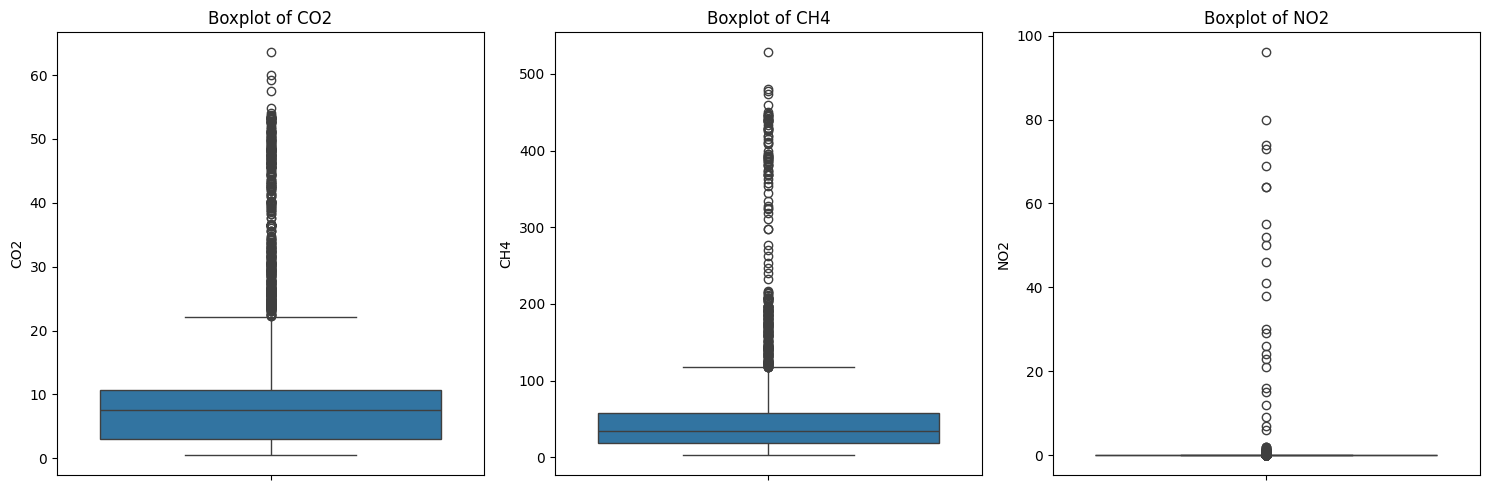

In [ ]:
plt.figure(figsize=(15, 5))

# Boxplot untuk fitur CO2
plt.subplot(1, 3, 1)
sns.boxplot(y=data['CO2'])
plt.title('Boxplot of CO2')

# Boxplot untuk fitur CH4
plt.subplot(1, 3, 2)
sns.boxplot(y=data['CH4'])
plt.title('Boxplot of CH4')

# Boxplot untuk fitur NO2
plt.subplot(1, 3, 3)
sns.boxplot(y=data['NO2'])
plt.title('Boxplot of NO2')

plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Mendeteksi outlier untuk setiap fitur
outliers_co2 = detect_outliers(data, 'CO2')
outliers_ch4 = detect_outliers(data, 'CH4')
# outliers_no2 = detect_outliers(data, 'NO2')

# Menggabungkan semua outlier
# all_outliers = pd.concat([outliers_co2, outliers_ch4, outliers_no2]).drop_duplicates() # Aku hapus bagian no2 karena dia membuang semua nilai selain 0
all_outliers = pd.concat([outliers_co2, outliers_ch4]).drop_duplicates()

# # Menampilkan 30 outlier teratas berdasarkan indeks
# top_30_outliers = all_outliers.head(30)

# print("Top 30 Outliers:")
# top_30_outliers

all_outliers

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
1440,2024/03/25-10:39,0.0,0.0,81.85,24.16,0.59,Pembukaan Lahan
1442,2024/03/25-10:39,0.0,0.0,99.70,27.70,0.49,Pembukaan Lahan
1443,2024/03/25-10:39,0.0,0.0,105.85,29.26,0.52,Pembukaan Lahan
1444,2024/03/25-10:40,0.0,0.0,104.56,29.04,0.48,Pembukaan Lahan
1445,2024/03/25-10:40,0.0,0.0,77.83,24.72,0.51,Pembukaan Lahan
...,...,...,...,...,...,...,...
3794,2024/03/30-10:01,0.0,0.0,121.87,16.91,0.98,Panen
3795,2024/03/30-10:01,0.0,0.0,153.44,20.28,0.90,Panen
5628,2024/03/31-11:25,0.0,0.0,123.22,20.75,0.58,Pemupukan
5629,2024/03/31-11:25,0.0,0.0,136.45,19.69,0.53,Pemupukan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   7313 non-null   object 
 1   Latitude    7313 non-null   float64
 2   Longtitude  7313 non-null   float64
 3   CH4         7313 non-null   float64
 4   CO2         7313 non-null   float64
 5   NO2         7313 non-null   float64
 6   Status      7313 non-null   object 
dtypes: float64(5), object(2)
memory usage: 400.1+ KB


In [ ]:
data.head()

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,2024/03/24-9:45,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan
1,2024/03/24-9:45,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan
2,2024/03/24-9:45,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan
3,2024/03/24-9:45,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan
4,2024/03/24-9:45,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan


In [ ]:
data.describe()

,Latitude,Longtitude,CH4,CO2,NO2
count,7313.000000,7313.000000,7313.000000,7313.000000,7313.000000
mean,-3.849189,58.729683,45.079326,8.977384,0.154205
std,3.589951,54.719929,47.996148,8.618089,2.804165
min,-7.500000,0.000000,2.820000,0.510000,0.000000
25%,-7.320000,0.000000,18.070000,2.990000,0.000000
50%,-6.910000,108.940000,34.450000,7.550000,0.000000
75%,0.000000,110.030000,57.790000,10.660000,0.000000
max,0.000000,110.500000,528.080000,63.530000,96.000000


In [ ]:
# # Mengelompokkan data berdasarkan 'DateTime' dan menghitung rata-rata setiap gas
# data_avg = data.groupby(['Timestamp', 'Status']).agg({'CO2': 'mean', 'CH4': 'mean', 'NO2': 'mean'}).reset_index()
# data_avg

In [ ]:
# # visualisasi data co2
# fig = px.line(data_avg, x='Timestamp', y='CO2', title='CO2 Data')
# fig.show()

In [ ]:
# # visualisasi data ch4
# fig = px.line(data_avg, x='Timestamp', y='CH4', title='CH4 Data')
# fig.show()

In [ ]:
# # visualisasi data NO2
# fig = px.line(data_avg, x='Timestamp', y='NO2', title='NO2 Data')
# fig.show()

### Menanganni Outlier


In [ ]:
# Mendapatkan indeks outlier
outlier_indices = all_outliers.index

# Menghapus outlier dari DataFrame asli
data_cleaned = data.drop(outlier_indices)

# Menampilkan DataFrame yang telah dibersihkan
print("DataFrame setelah menghapus outliers:")
data_cleaned

DataFrame setelah menghapus outliers:


,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status
0,2024/03/24-9:45,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan
1,2024/03/24-9:45,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan
2,2024/03/24-9:45,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan
3,2024/03/24-9:45,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan
4,2024/03/24-9:45,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan
...,...,...,...,...,...,...,...
7308,2024/03/31-13:33,0.0,0.0,33.59,5.84,0.0,Pemupukan
7309,2024/03/31-13:33,0.0,0.0,31.99,6.00,0.0,Pemupukan
7310,2024/03/31-13:33,0.0,0.0,31.58,5.90,0.0,Pemupukan
7311,2024/03/31-13:33,0.0,0.0,32.12,6.00,0.0,Pemupukan


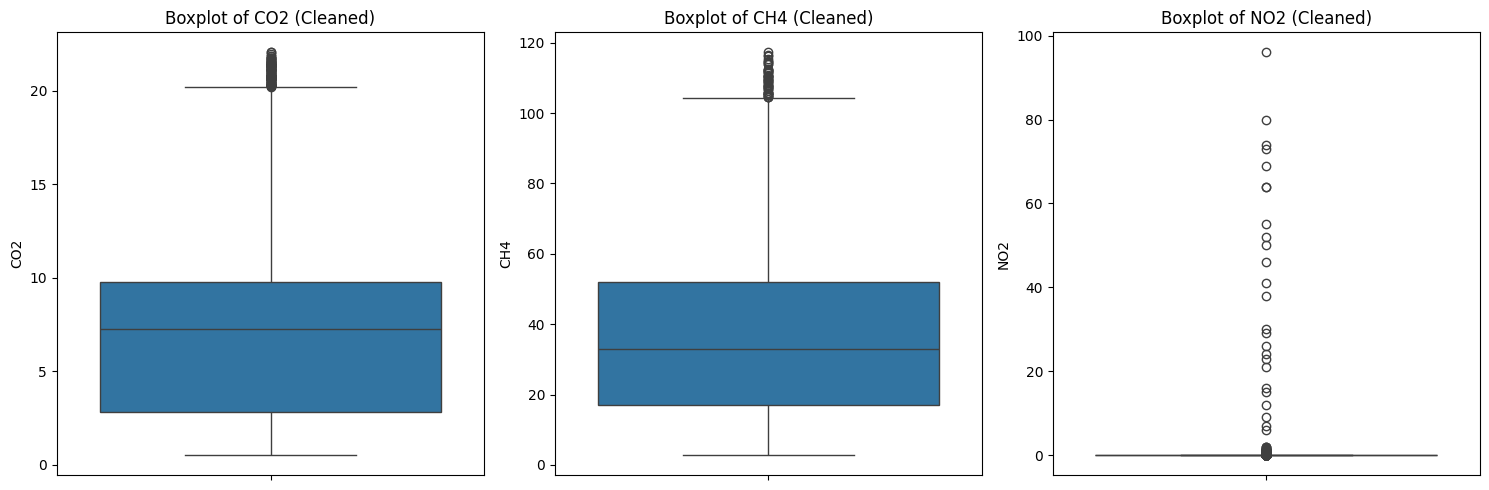

In [ ]:
# Membuat boxplot untuk kolom 'CO2', 'CH4', dan 'NO2' pada data yang telah dibersihkan
plt.figure(figsize=(15, 5))

# Boxplot untuk fitur CO2
plt.subplot(1, 3, 1)
sns.boxplot(y=data_cleaned['CO2'])
plt.title('Boxplot of CO2 (Cleaned)')

# Boxplot untuk fitur CH4
plt.subplot(1, 3, 2)
sns.boxplot(y=data_cleaned['CH4'])
plt.title('Boxplot of CH4 (Cleaned)')

# Boxplot untuk fitur NO2
plt.subplot(1, 3, 3)
sns.boxplot(y=data_cleaned['NO2'])
plt.title('Boxplot of NO2 (Cleaned)')

plt.tight_layout()
plt.show()

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6867 entries, 0 to 7312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   6867 non-null   object 
 1   Latitude    6867 non-null   float64
 2   Longtitude  6867 non-null   float64
 3   CH4         6867 non-null   float64
 4   CO2         6867 non-null   float64
 5   NO2         6867 non-null   float64
 6   Status      6867 non-null   object 
dtypes: float64(5), object(2)
memory usage: 687.2+ KB


Sudah di coba membuang outlier nya ternyata kena bagian no2 jadinya 0 semua 😅

In [ ]:
# visualisasi data NO2
fig = px.line(data_cleaned, x='Timestamp', y='NO2', title='NO2 Data')
fig.show()

In [ ]:
# visualisasi data co2
fig = px.line(data_cleaned, x='Timestamp', y='CO2', title='CO2 Data')
fig.show()

In [ ]:
# visualisasi data ch4
fig = px.line(data_cleaned, x='Timestamp', y='CH4', title='CH4 Data')
fig.show()

## Clustering

### Tanpa PCA

In [ ]:
data_no_pca = data
features1 = data_no_pca[['Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2']]

In [ ]:
scaler = StandardScaler()
data_scaled1 = scaler.fit_transform(features1)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters1 = kmeans.fit_predict(data_scaled1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data_no_pca['Cluster'] = clusters1

# Map the cluster labels to your defined categories
label_mapping = {0: 'low', 1: 'medium', 2: 'high'}
data_no_pca['Label'] = data_no_pca['Cluster'].map(label_mapping)

In [ ]:
data_no_pca

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status,Cluster,Label
0,2024/03/24-9:45,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan,0,low
1,2024/03/24-9:45,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan,0,low
2,2024/03/24-9:45,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan,0,low
3,2024/03/24-9:45,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan,0,low
4,2024/03/24-9:45,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan,0,low
...,...,...,...,...,...,...,...,...,...
7308,2024/03/31-13:33,0.0,0.0,33.59,5.84,0.0,Pemupukan,0,low
7309,2024/03/31-13:33,0.0,0.0,31.99,6.00,0.0,Pemupukan,0,low
7310,2024/03/31-13:33,0.0,0.0,31.58,5.90,0.0,Pemupukan,0,low
7311,2024/03/31-13:33,0.0,0.0,32.12,6.00,0.0,Pemupukan,0,low


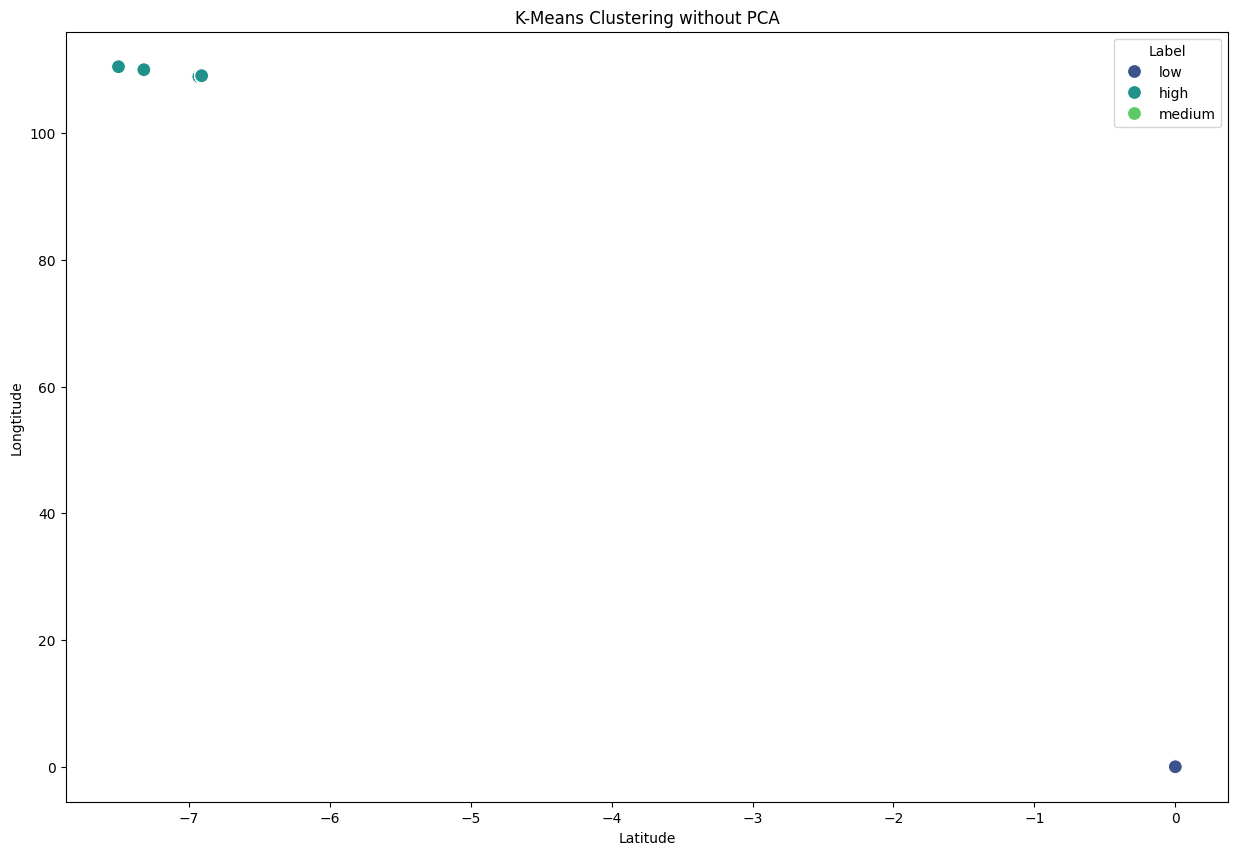

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Latitude', y='Longtitude', hue='Label', data=data_no_pca, palette='viridis', s=100)
plt.title('K-Means Clustering without PCA')
plt.show()

In [ ]:
silhouette_avg1 = silhouette_score(data_scaled1, clusters1)
dbi_score1 = davies_bouldin_score(data_scaled1, clusters1)

print(f"Silhouette Score: {silhouette_avg1}")
print(f"Davies-Bouldin Index: {dbi_score1}")

Silhouette Score: 0.6775838866569076
Davies-Bouldin Index: 0.5385627690526906


### Dengan Outlier

In [ ]:
data_outlier = data
features2 = data_outlier[['Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2']]

In [ ]:
scaler = StandardScaler()
data_scaled2 = scaler.fit_transform(features2)

In [ ]:
pca = PCA(n_components=2)
pca_data2 = pca.fit_transform(data_scaled2)

In [ ]:
pca_data2

array([[ 0.58199948, -1.67781589],
       [ 0.5972482 , -1.65855442],
       [ 0.59538181, -1.66085879],
       ...,
       [ 0.89045133, -1.29802042],
       [ 0.90064759, -1.28550257],
       [ 0.95624474, -1.21298835]])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters2 = kmeans.fit_predict(pca_data2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data_outlier['PCA1'] = pca_data2[:, 0]
data_outlier['PCA2'] = pca_data2[:, 1]
data_outlier['Cluster'] = clusters2

In [ ]:
label_mapping = {0: 'low', 1: 'medium', 2: 'high'}
data_outlier['Label'] = data_outlier['Cluster'].map(label_mapping)

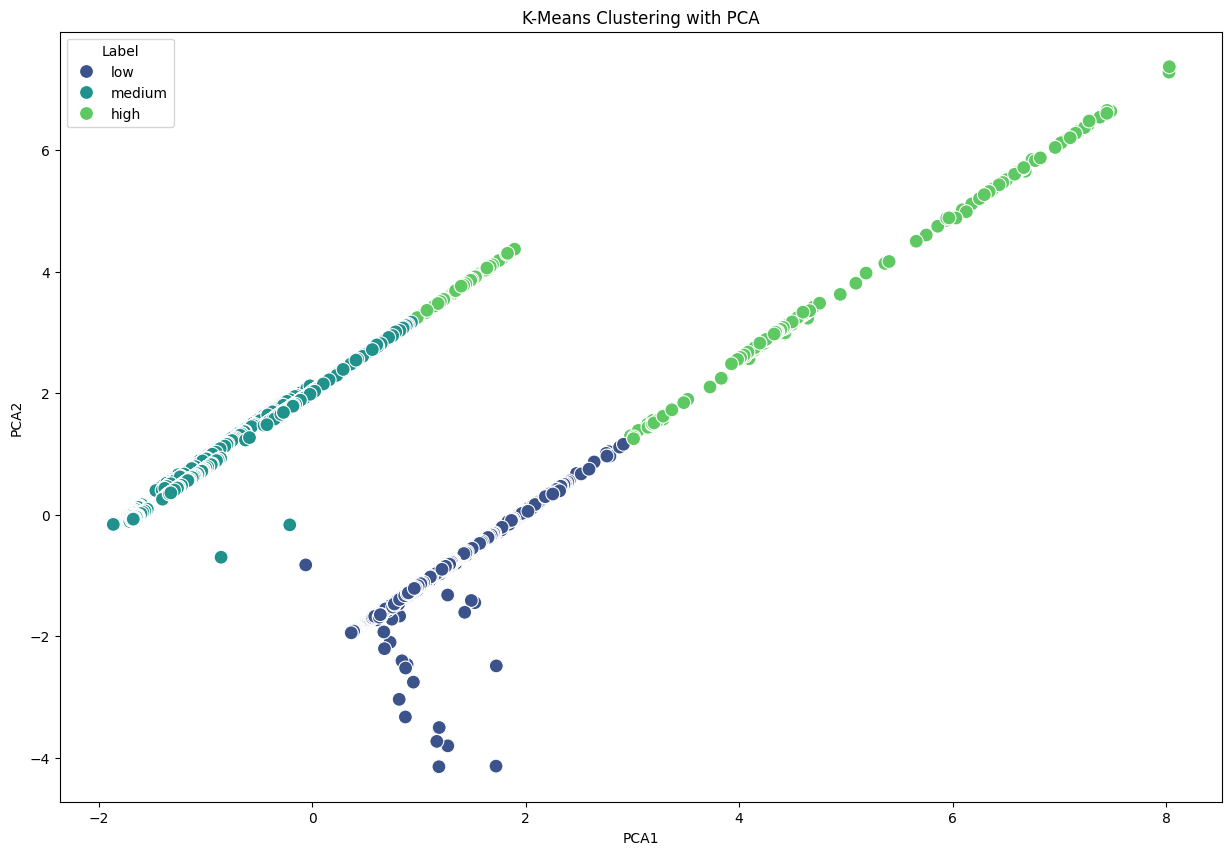

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Label', data = data_outlier, palette='viridis', s=100)
plt.title('K-Means Clustering with PCA')
plt.show()

* Silhouette Score: Nilai antara -1 dan 1; lebih tinggi lebih baik. Mengukur seberapa baik titik berada dalam klasternya dibandingkan dengan klaster lain.

* Davies-Bouldin Index: Nilai positif; lebih rendah lebih baik. Mengukur seberapa baik klaster dipisahkan dan seberapa kompak mereka.

In [ ]:
# Evaluasi clustering
silhouette_avg2 = silhouette_score(pca_data2, clusters2)
dbi_score2 = davies_bouldin_score(pca_data2, clusters2)

print(f"Silhouette Score: {silhouette_avg2}")
print(f"Davies-Bouldin Index: {dbi_score2}")

Silhouette Score: 0.7059993853444781
Davies-Bouldin Index: 0.4581684447414179


In [ ]:
label_count = data_outlier['Label'].value_counts().reset_index()
label_count.columns = ['Label', 'Count']

label_count

,Label,Count
0,medium,3857
1,low,3217
2,high,239


### Data Bersih Outlier

In [ ]:
data_no_outlier = data_cleaned
features = data_no_outlier[['Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2']]

In [ ]:
scaler = StandardScaler()
data_scaled3 = scaler.fit_transform(features)

In [ ]:
pca = PCA(n_components=2)
pca_data3 = pca.fit_transform(data_scaled3)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters3 = kmeans.fit_predict(pca_data3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data_no_outlier['PCA1'] = pca_data3[:, 0]
data_no_outlier['PCA2'] = pca_data3[:, 1]
data_no_outlier['Cluster'] = clusters3

In [ ]:
label_mapping = {0: 'low', 1: 'medium', 2: 'high'}
data_no_outlier['Label'] = data_no_outlier['Cluster'].map(label_mapping)

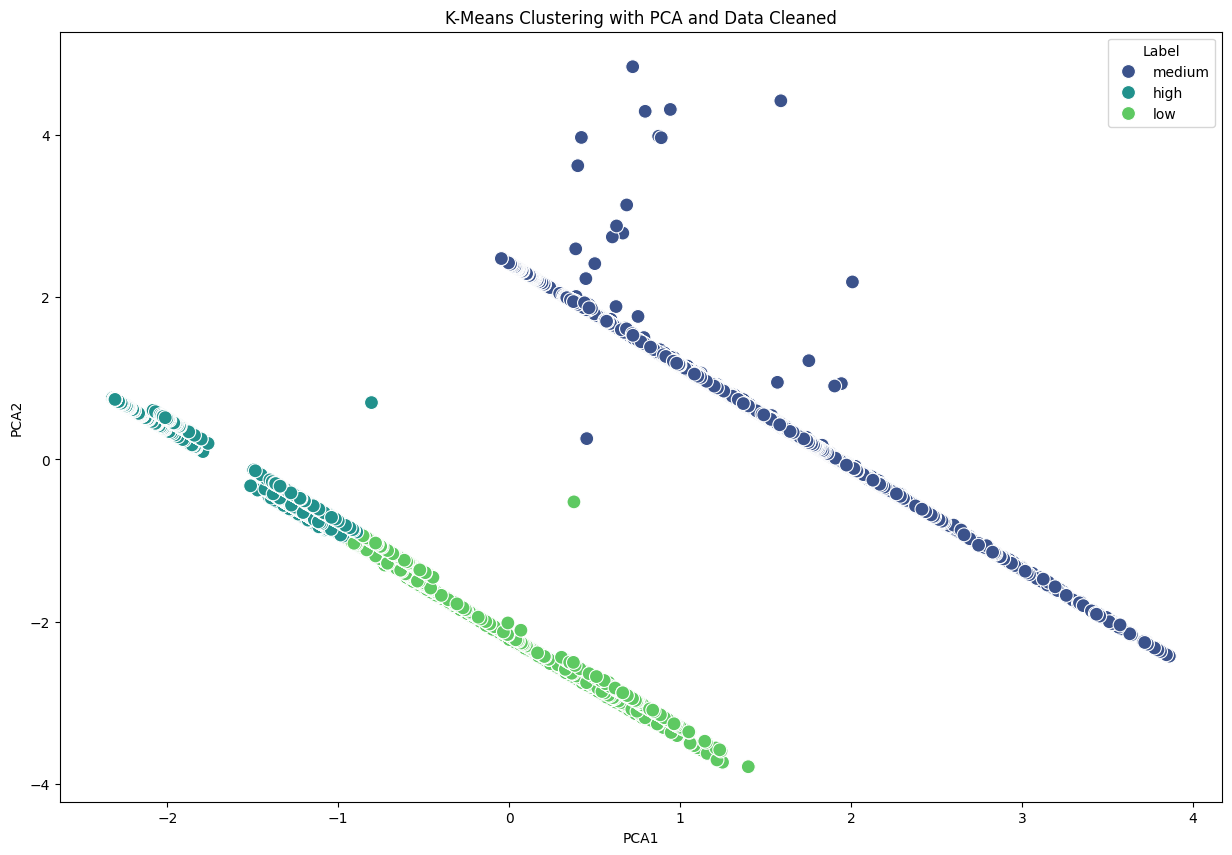

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Label', data = data_no_outlier, palette='viridis', s=100)
plt.title('K-Means Clustering with PCA and Data Cleaned')
plt.show()

In [ ]:
# Evaluasi clustering
silhouette_avg3 = silhouette_score(pca_data3, clusters3)
dbi_score3 = davies_bouldin_score(pca_data3, clusters3)

print(f"Silhouette Score: {silhouette_avg3}")
print(f"Davies-Bouldin Index: {dbi_score3}")

Silhouette Score: 0.5646323825620649
Davies-Bouldin Index: 0.5923159522555036


## Classification

Pakai yang data dengan outlier + pca

In [ ]:
data_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   7313 non-null   object 
 1   Latitude    7313 non-null   float64
 2   Longtitude  7313 non-null   float64
 3   CH4         7313 non-null   float64
 4   CO2         7313 non-null   float64
 5   NO2         7313 non-null   float64
 6   Status      7313 non-null   object 
 7   Cluster     7313 non-null   int32  
 8   Label       7313 non-null   object 
 9   PCA1        7313 non-null   float64
 10  PCA2        7313 non-null   float64
dtypes: float64(7), int32(1), object(3)
memory usage: 600.0+ KB


In [ ]:
data_class = data_outlier[['Timestamp','Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2', 'Label']]
# data_class = data_outlier[['Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2', 'Label']]
# data_class = data_no_pca[[ 'CO2', 'CH4', 'NO2', 'Label']]

In [ ]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   7313 non-null   object 
 1   Latitude    7313 non-null   float64
 2   Longtitude  7313 non-null   float64
 3   CO2         7313 non-null   float64
 4   CH4         7313 non-null   float64
 5   NO2         7313 non-null   float64
 6   Label       7313 non-null   object 
dtypes: float64(5), object(2)
memory usage: 400.1+ KB


In [ ]:
X = data_class[['Timestamp','Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2']]
# X = data_class[['Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2']]
# X = data_class[['CO2', 'CH4', 'NO2']]
y = data_class[['Label']]

In [ ]:
display(X)

,Timestamp,Latitude,Longtitude,CO2,CH4,NO2
0,2024/03/24-9:45,0.0,0.0,2.73,16.00,0.0
1,2024/03/24-9:45,0.0,0.0,2.95,16.44,0.0
2,2024/03/24-9:45,0.0,0.0,2.93,16.35,0.0
3,2024/03/24-9:45,0.0,0.0,2.94,16.35,64.0
4,2024/03/24-9:45,0.0,0.0,2.92,15.74,0.0
...,...,...,...,...,...,...
7308,2024/03/31-13:33,0.0,0.0,5.84,33.59,0.0
7309,2024/03/31-13:33,0.0,0.0,6.00,31.99,0.0
7310,2024/03/31-13:33,0.0,0.0,5.90,31.58,0.0
7311,2024/03/31-13:33,0.0,0.0,6.00,32.12,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   7313 non-null   object 
 1   Latitude    7313 non-null   float64
 2   Longtitude  7313 non-null   float64
 3   CO2         7313 non-null   float64
 4   CH4         7313 non-null   float64
 5   NO2         7313 non-null   float64
dtypes: float64(5), object(1)
memory usage: 342.9+ KB


In [ ]:
# # Encode the 'Timestamp' as a categorical feature
X['Timestamp'] = X['Timestamp'].astype('category').cat.codes

<ipython-input-380-6aa6df254e29>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9986326344576116
Classification Report:
              precision    recall  f1-score   support

        high       0.97      0.99      0.98        76
         low       1.00      1.00      1.00       984
      medium       1.00      1.00      1.00      1134

    accuracy                           1.00      2194
   macro avg       0.99      0.99      0.99      2194
weighted avg       1.00      1.00      1.00      2194



In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svc_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9963536918869644
Classification Report:
              precision    recall  f1-score   support

        high       0.96      0.95      0.95        76
         low       1.00      1.00      1.00       984
      medium       1.00      1.00      1.00      1134

    accuracy                           1.00      2194
   macro avg       0.99      0.98      0.98      2194
weighted avg       1.00      1.00      1.00      2194



In [ ]:
data_outlier

,Timestamp,Latitude,Longtitude,CH4,CO2,NO2,Status,Cluster,Label,PCA1,PCA2
0,2024/03/24-9:45,0.0,0.0,16.00,2.73,0.0,Persiapan Lahan,0,low,0.581999,-1.677816
1,2024/03/24-9:45,0.0,0.0,16.44,2.95,0.0,Persiapan Lahan,0,low,0.597248,-1.658554
2,2024/03/24-9:45,0.0,0.0,16.35,2.93,0.0,Persiapan Lahan,0,low,0.595382,-1.660859
3,2024/03/24-9:45,0.0,0.0,16.35,2.94,64.0,Persiapan Lahan,0,low,1.181888,-3.510462
4,2024/03/24-9:45,0.0,0.0,15.74,2.92,0.0,Persiapan Lahan,0,low,0.589023,-1.668264
...,...,...,...,...,...,...,...,...,...,...,...
7308,2024/03/31-13:33,0.0,0.0,33.59,5.84,0.0,Pemupukan,0,low,0.906747,-1.279702
7309,2024/03/31-13:33,0.0,0.0,31.99,6.00,0.0,Pemupukan,0,low,0.899399,-1.286941
7310,2024/03/31-13:33,0.0,0.0,31.58,5.90,0.0,Pemupukan,0,low,0.890451,-1.298020
7311,2024/03/31-13:33,0.0,0.0,32.12,6.00,0.0,Pemupukan,0,low,0.900648,-1.285503


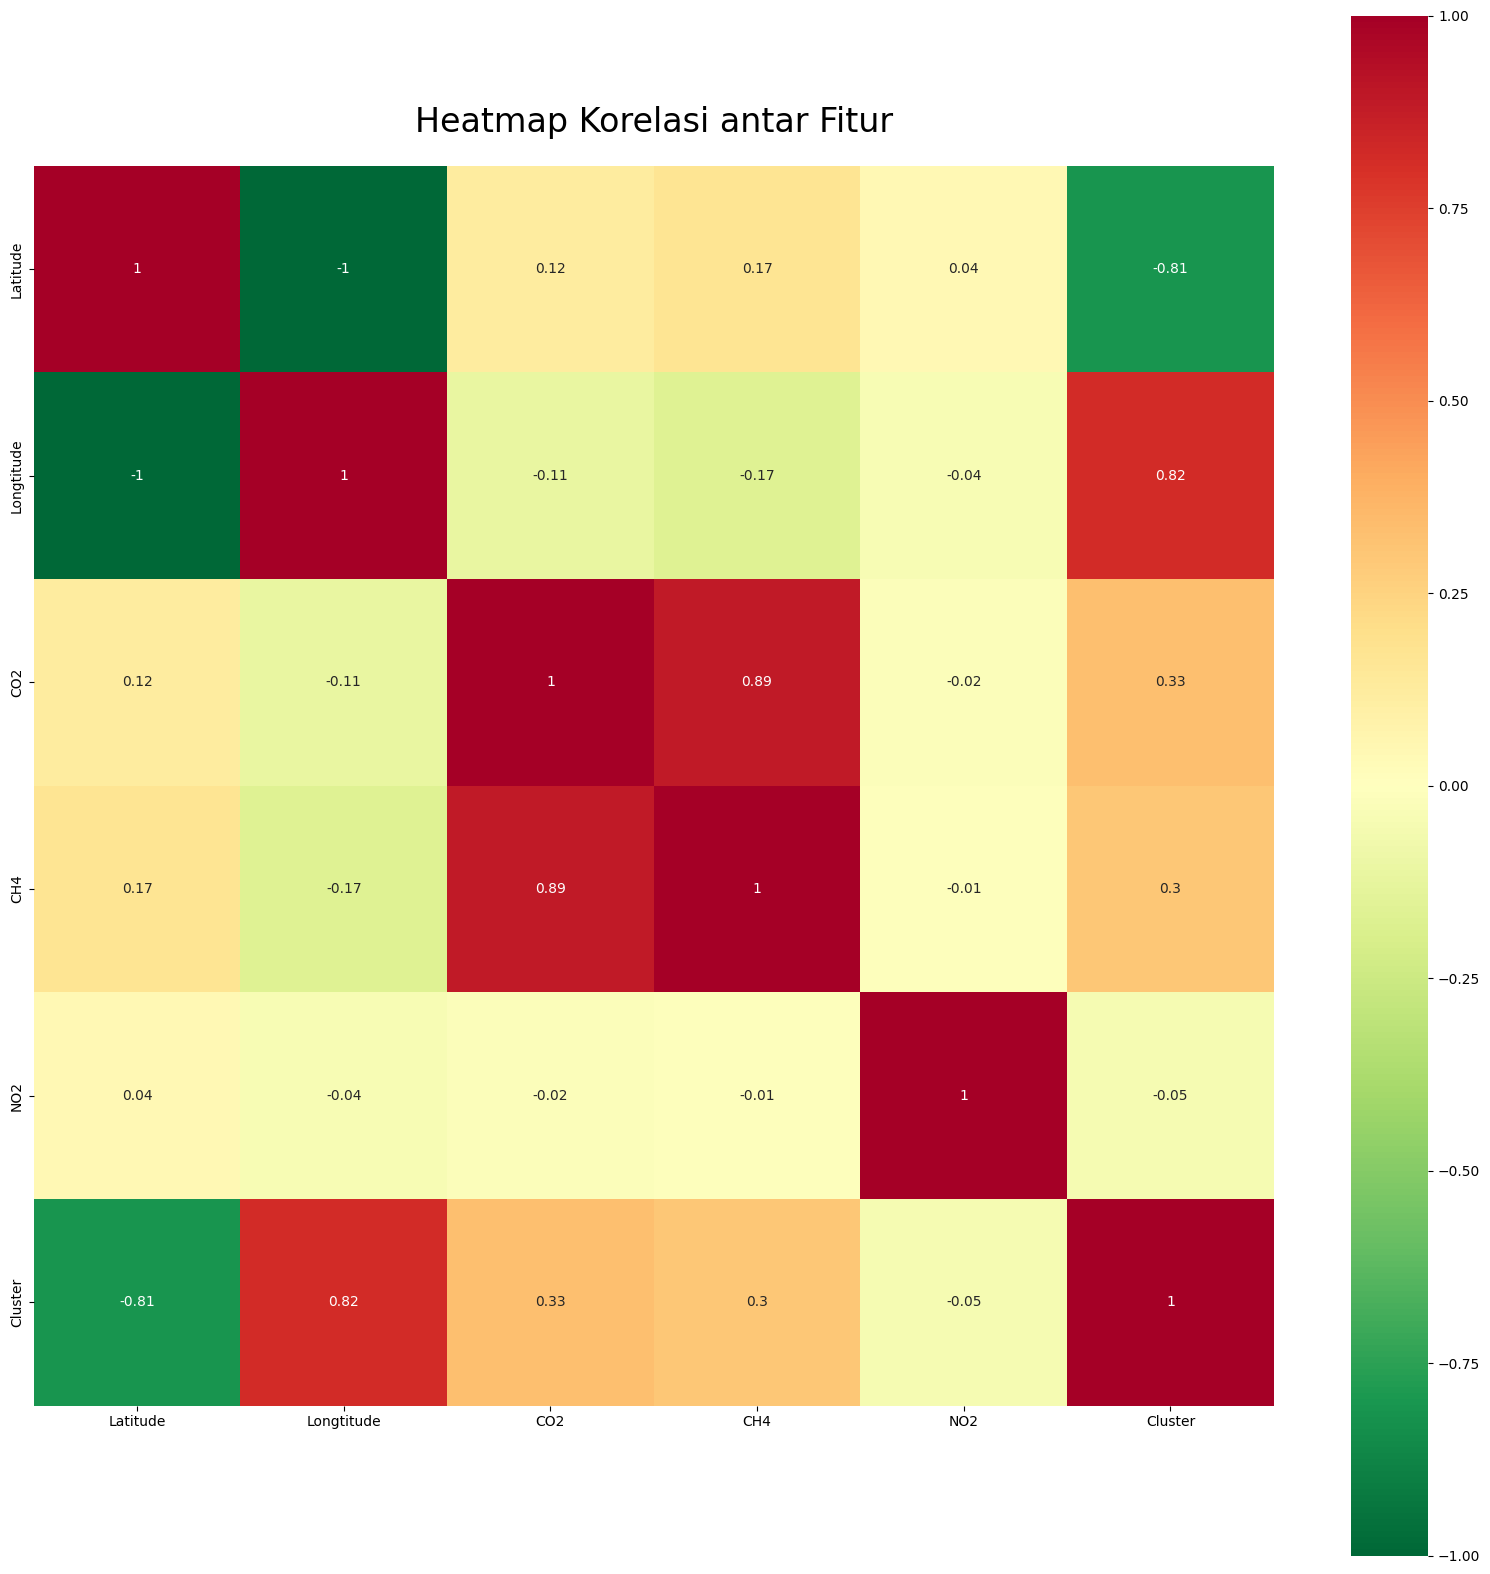

In [ ]:
# Menampilkan Korelasi antar Fitur
correlation = data_outlier[['Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2', 'Cluster']].corr()
plt.figure(figsize=(20, 20))
plt.title("Heatmap Korelasi antar Fitur", y=1.02, fontdict={'size': 24})
sns.heatmap(
  correlation.round(2),
  annot = True,
  vmax = 1,
  square = True,
  cmap = 'RdYlGn_r'
)

plt.show()

In [ ]:
# Mengelompokkan data berdasarkan 'DateTime' dan menghitung rata-rata setiap gas
data_avg = data_outlier.groupby(['Status']).agg({'CO2': 'mean', 'CH4': 'mean', 'NO2': 'mean'}).reset_index()
data_avg

,Status,CO2,CH4,NO2
0,Panen,6.529934,36.833643,0.022419
1,Pembukaan Lahan,7.624020,35.462453,0.016379
2,Pemupukan,14.623719,61.224587,0.014793
3,Persiapan Lahan,7.654001,52.345475,0.714385


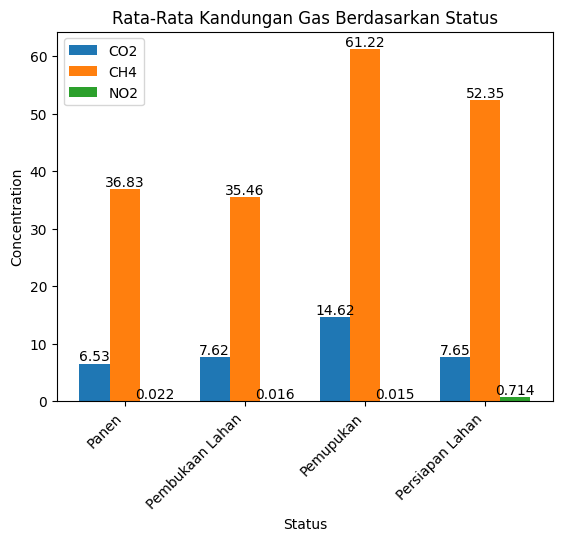

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
statuses = ['Panen', 'Pembukaan Lahan', 'Pemupukan', 'Persiapan Lahan']
CO2_values = data_avg['CO2']
CH4_values = data_avg['CH4']
NO2_values = data_avg['NO2']

X_axis = np.arange(len(statuses))

# Width of the bars
width = 0.25

# Plotting the bars
plt.bar(X_axis - width, CO2_values, width, label='CO2')
plt.bar(X_axis, CH4_values, width, label='CH4')
plt.bar(X_axis + width, NO2_values, width, label='NO2')

# Add text annotations
for i, value in enumerate(CO2_values):
    plt.text(i - width, value, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(CH4_values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(NO2_values):
    plt.text(i + width, value, f'{value:.3f}', ha='center', va='bottom')

# Customize the plot
plt.xticks(X_axis, statuses, rotation=45, ha='right')
plt.xlabel('Status')
plt.ylabel('Concentration')
plt.title('Rata-Rata Kandungan Gas Berdasarkan Status')
plt.legend()

# Show the plot
plt.show()


In [ ]:
df_export = data_outlier[['Timestamp','Latitude', 'Longtitude', 'CO2', 'CH4', 'NO2', 'Label']]
df_export.to_csv(r"/content/drive/MyDrive/KKI COE/dataset/ghg_iot_all.csv", index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7313 entries, 0 to 7312
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   7313 non-null   object 
 1   Latitude    7313 non-null   float64
 2   Longtitude  7313 non-null   float64
 3   CH4         7313 non-null   float64
 4   CO2         7313 non-null   float64
 5   NO2         7313 non-null   float64
 6   Status      7313 non-null   object 
 7   Cluster     7313 non-null   int32  
 8   Label       7313 non-null   object 
 9   PCA1        7313 non-null   float64
 10  PCA2        7313 non-null   float64
dtypes: float64(7), int32(1), object(3)
memory usage: 600.0+ KB


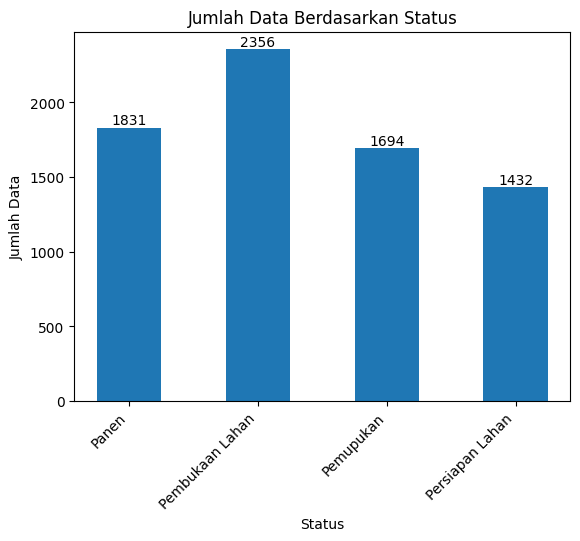

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Contoh data (ganti dengan data sebenarnya)
statuses = ['Panen', 'Pembukaan Lahan', 'Pemupukan', 'Persiapan Lahan']
data = {
    'Panen': (data['Status'] == 'Panen').value_counts()[True],
    'Pembukaan Lahan': (data['Status'] == 'Pembukaan Lahan').value_counts()[True],
    'Pemupukan': (data['Status'] == 'Pemupukan').value_counts()[True],
    'Persiapan Lahan': (data['Status'] == 'Persiapan Lahan').value_counts()[True]

}

# Menghitung jumlah data untuk setiap status
counts = [data[status] for status in statuses]

# Data untuk plotting
X_axis = np.arange(len(statuses))

# Plotting the bars
plt.bar(X_axis, counts, width=0.5)

# Add text annotations
for i, count in enumerate(counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom')

# Customize the plot
plt.xticks(X_axis, statuses, rotation=45, ha='right')
plt.xlabel('Status')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Berdasarkan Status')

# Show the plot
plt.show()


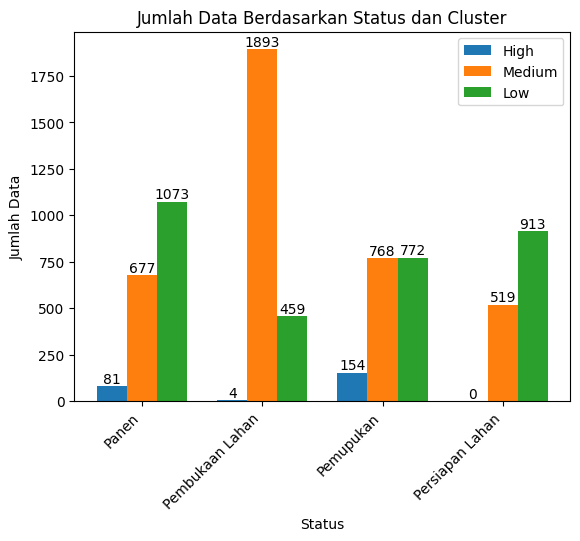

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = data_outlier

statuses = ['Panen', 'Pembukaan Lahan', 'Pemupukan', 'Persiapan Lahan']
clusters = ['high', 'medium', 'low']

# Menghitung jumlah data untuk setiap cluster dalam setiap status
count_data = {status: {cluster: len(df[(df['Status'] == status) & (df['Label'] == cluster)])
                      for cluster in clusters}
              for status in statuses}

# Menyiapkan data untuk plotting
X_axis = np.arange(len(statuses))
high_counts = [count_data[status]['high'] for status in statuses]
medium_counts = [count_data[status]['medium'] for status in statuses]
low_counts = [count_data[status]['low'] for status in statuses]

# Plotting the bars
bar_width = 0.25

plt.bar(X_axis - bar_width, high_counts, width=bar_width, label='High')
plt.bar(X_axis, medium_counts, width=bar_width, label='Medium')
plt.bar(X_axis + bar_width, low_counts, width=bar_width, label='Low')

# Add text annotations
for i in range(len(statuses)):
    plt.text(i - bar_width, high_counts[i], f'{high_counts[i]}', ha='center', va='bottom')
    plt.text(i, medium_counts[i], f'{medium_counts[i]}', ha='center', va='bottom')
    plt.text(i + bar_width, low_counts[i], f'{low_counts[i]}', ha='center', va='bottom')

# Customize the plot
plt.xticks(X_axis, statuses, rotation=45, ha='right')
plt.xlabel('Status')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Berdasarkan Status dan Cluster')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Contoh DataFrame (ganti dengan data sebenarnya)
# # df = pd.DataFrame(data_outlier)

# statuses = ['Panen', 'Pembukaan Lahan', 'Pemupukan', 'Persiapan Lahan']
# clusters = ['high', 'medium', 'low']

# # Menghitung rata-rata nilai untuk setiap cluster dalam setiap status
# mean_data = {status: {cluster: df[(df['Status'] == status) & (df['Label'] == cluster)]['Value'].mean()
#                       for cluster in clusters}
#               for status in statuses}

# # Menyiapkan data untuk plotting
# X_axis = np.arange(len(statuses))
# high_means = [mean_data[status]['high'] for status in statuses]
# medium_means = [mean_data[status]['medium'] for status in statuses]
# low_means = [mean_data[status]['low'] for status in statuses]

# # Plotting the bars
# bar_width = 0.25

# plt.bar(X_axis - bar_width, high_means, width=bar_width, label='High')
# plt.bar(X_axis, medium_means, width=bar_width, label='Medium')
# plt.bar(X_axis + bar_width, low_means, width=bar_width, label='Low')

# # Add text annotations
# for i in range(len(statuses)):
#     plt.text(i - bar_width, high_means[i], f'{high_means[i]:.2f}', ha='center', va='bottom')
#     plt.text(i, medium_means[i], f'{medium_means[i]:.2f}', ha='center', va='bottom')
#     plt.text(i + bar_width, low_means[i], f'{low_means[i]:.2f}', ha='center', va='bottom')

# # Customize the plot
# plt.xticks(X_axis, statuses, rotation=45, ha='right')
# plt.xlabel('Status')
# plt.ylabel('Rata-rata Nilai')
# plt.title('Rata-rata Nilai Berdasarkan Status dan Cluster')
# plt.legend()

# # Show the plot
# plt.show()
